In [30]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

In [31]:
# import functions from modsim

from modsim import *

In [32]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from modsim import State, System, interpolate,  run_solve_ivp

In [33]:
np.random.seed(42)
time_points = np.arange(0, 240, 15)

In [34]:
paracetamol_concentration = 5 * np.exp(-0.02 * time_points) + np.random.normal(0, 0.5, len(time_points))


In [35]:
paracetamol_data = pd.DataFrame({'time': time_points, 'paracetamol': paracetamol_concentration})


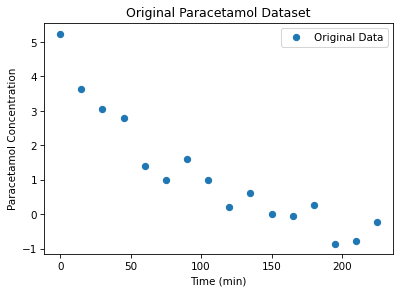

In [36]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Original Data')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Original Paracetamol Dataset')
plt.legend()
plt.show()

In [37]:
paracetamol_interpolator = interp1d(paracetamol_data['time'], paracetamol_data['paracetamol'], kind='linear', fill_value="extrapolate")


In [38]:
t_0 = paracetamol_data['time'].min()
t_end = paracetamol_data['time'].max()
t_array = np.arange(t_0, t_end, 1)

In [39]:
paracetamol_simulation = paracetamol_interpolator(t_array)


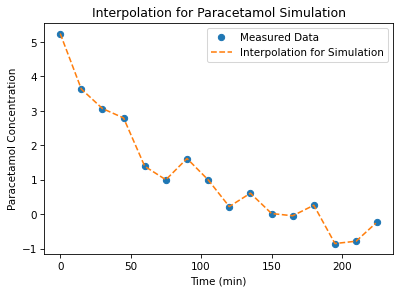

In [40]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Measured Data')
plt.plot(t_array, paracetamol_simulation, label='Interpolation for Simulation', linestyle='--')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Interpolation for Paracetamol Simulation')
plt.legend()
plt.show()


In [41]:
paracetamol_interpolator = interp1d(paracetamol_data['time'], paracetamol_data['paracetamol'], kind='linear', fill_value="extrapolate")


In [42]:
t_0 = paracetamol_data['time'].min()
t_end = paracetamol_data['time'].max()
t_array = np.arange(t_0, t_end, 1)


In [43]:
paracetamol_simulation = paracetamol_interpolator(t_array)


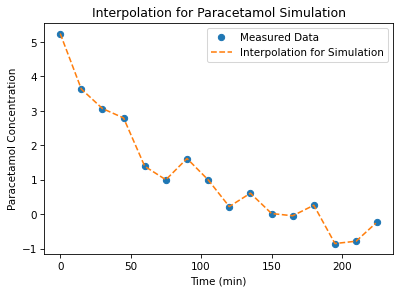

In [44]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Measured Data')
plt.plot(t_array, paracetamol_simulation, label='Interpolation for Simulation', linestyle='--')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Interpolation for Paracetamol Simulation')
plt.legend()
plt.show()



In [45]:
P0 = 10
k1 = 0.02
k2 = 0.02

In [46]:
paracetamol_system = System(init=State(P=P0), params=(k1, k2),
                            t_0=t_0, t_end=t_end, dt=2)

In [47]:
def paracetamol_update_func(t, state, system):
    P, = state
    k1, k2 = system.params
    dt = system.dt

    dPdt = -k1 * P
    P += dPdt * dt

    return State(P=P)


In [48]:
paracetamol_results = run_simulation(paracetamol_system, paracetamol_update_func)


In [49]:
def paracetamol_slope_func(t, state, system):
    P, = state
    k1, k2 = system.params

    dPdt = -k1 * P

    return dPdt

In [50]:
paracetamol_results = run_simulation(paracetamol_system, paracetamol_update_func)


In [51]:
def paracetamol_slope_func(t, state, system):
    P, = state
    k1, k2 = system.params

    dPdt = -k1 * P

    return dPdt


In [52]:
paracetamol_results_solve_ivp, _ = run_solve_ivp(paracetamol_system, paracetamol_slope_func,
                                                t_eval=paracetamol_results.index)

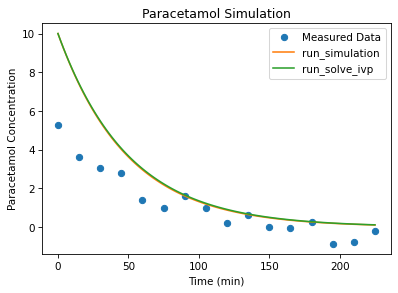

In [53]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Measured Data')
plt.plot(paracetamol_results.index, paracetamol_results['P'], label='run_simulation')
plt.plot(paracetamol_results_solve_ivp.index, paracetamol_results_solve_ivp['P'], label='run_solve_ivp')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Paracetamol Simulation')
plt.legend()
plt.show()